In [14]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm
import arviz as az


In [15]:
az.style.use('arviz-darkgrid')
%matplotlib inline


In [16]:

np.random.seed(123)
theta_real = 0.35 # unknown value in a real experiment
trial_counts = [10,100,1000]

10
    mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
θ  0.419  0.136    0.17    0.677      0.003    0.002    1645.0  1645.0   

   ess_bulk  ess_tail  r_hat  
θ    1654.0    2394.0    1.0  
100
   mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
θ  0.39  0.047   0.298    0.475      0.001    0.001    1640.0  1640.0   

   ess_bulk  ess_tail  r_hat  
θ    1643.0    2813.0    1.0  
1000
    mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
θ  0.366  0.015   0.337    0.393        0.0      0.0    1597.0  1597.0   

   ess_bulk  ess_tail  r_hat  
θ    1591.0    2737.0    1.0  


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [00:00<00:00, 6865.03draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [00:00<00:00, 7694.18draws/s]
The acceptance probability does not match the target. It is 0.89041321093078, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [00:00<00:00, 6887.21draws/s]
The acceptance probability does not match the target. It is 0.8794468270218586, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not ma

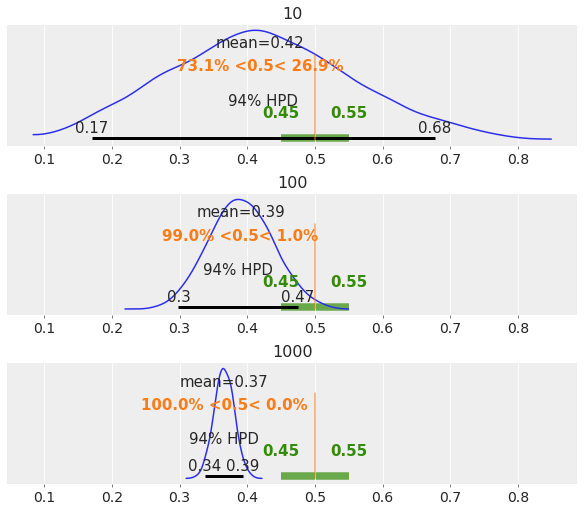

In [17]:
_,ax = plt.subplots(len(trial_counts), 1, sharex=True, sharey=False,
                    figsize=(8, 7), constrained_layout=True)

for trial_index in range(len(trial_counts)):
    trial_count = trial_counts[trial_index]
    print(trial_count)
    data = stats.bernoulli.rvs(p=theta_real, size=trial_count)
    with pm.Model() as our_first_model:
        # a priori - uniform
        θ = pm.Beta('θ', alpha=1., beta=1.)
        # likelihood p(y|θ)
        y = pm.Bernoulli('y', p=θ, observed=data)
        trace = pm.sample(1000, random_seed=123)
        
    df = az.summary(trace)
    print(df)
    ref_value = 0.5
    az.plot_posterior(trace, rope=[0.45, 0.55], ref_val=ref_value, ax = ax[trial_index])
    ax[trial_index].set_title(trial_count)
    
